# 02-Network correction and simplification

Alexis Neven & Valentin Dall'Alba

### Aim

This notebook simplifies a given network by:
- Reducing the number of nodes
- Reducing the number of edges
- Cleaning data to remove duplicate nodes
- Ensuring all nodes are connected
- Assigning a radius to each conduit


### Input
- Two text files exported from pykasso: nodes and edges

### Output
- Two text files: simplified nodes and edges, with attached radius

## Warm-up

Loads required modules and defines basic functions

In [2]:
from generate_karst_functions.function_graf_simplification import *
from generate_karst_functions.function_write_inputs_cfp import *

In [3]:
exec(open('generate_karst_functions/function_graf_simplification.py').read())
exec(open('generate_karst_functions/function_write_inputs_cfp.py').read())

## Examples of application

Reads the data and simplify. Some examples.


Summary of graph simplification:
Nb nodes export pykasso: 27801
Nb nodes after simplification - step 1: 1772
Nb nodes after simplification - step 2: 1782
Nb edges export pykasso: 27791
Nb edges after simplification: 1790
Check nodes coordinates and bounding box
Domain size: 0 2000 0 200
Original data range: 4.614619478412141 1986.426629328856 5.0 199.0
Simplified coordinates range: 2.0 1987.0 7.0 200.0
Theoretical box: 2.5 1997.5 2.5 197.5
Nb nodes in new segments: 1782
Nb nodes after simplification: 1782
Pipe diameter is added to newsegs array based on sampled sgs simulation!


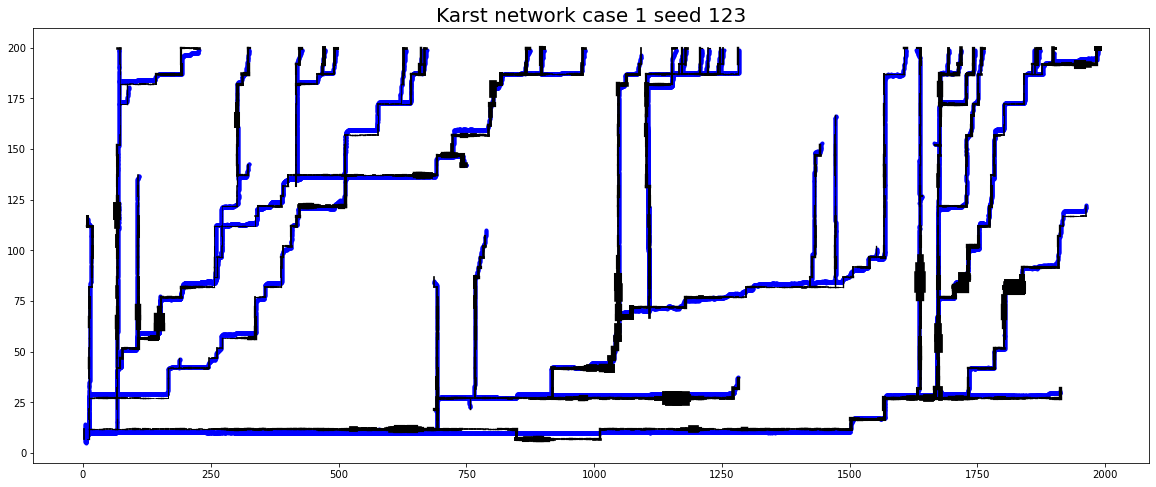

In [4]:
path_eg       = 'pykasso_networks/'
infile_nodes  = path_eg + 'nodes_cas1_123456789.txt'
infile_edges  = path_eg + 'edges_cas1_123456789.txt'
outfile_nodes = path_eg + 'toto_nodes.txt'
outfile_edges = path_eg + 'toto_eges.txt'

dx, dy = 5, 5              # Defines the super grid for the simplification
bbox   = [0, 2000, 0, 200] # The domain (only to control that points are inside)

nodes, segs = simplify_graph( infile_nodes, infile_edges , bbox, dx, dy, seed=12345678)
export_conduits(nodes, segs, outfile_nodes, outfile_edges)
plot_conduits(nodes, segs, infile_nodes, infile_edges)

## Simplify all graph from pyKasso and export the new files

Loop through the files present in pykasso_networks

In [4]:
#Define input and output path
path_input_pykasso         = 'pykasso_networks/'
path_output_simplification = 'pykasso_networks_simply/'

In [6]:
#Read seed number 
seed_nb       = []
files_pykasso = os.listdir(path_input_pykasso)

for name in files_pykasso:
    if name[:10] == 'edges_cas1':
        seed_nb.append(name[11:20])
    
print('######')
print('There is {} pykasso simulations in the input folder to simplify!'.format(len(seed_nb)))
print('######')

######
There is 1 pykasso simulations in the input folder to simplify!
######


Start symplifying files for cas number 1 :
Finish to symplified files for cas number 1!


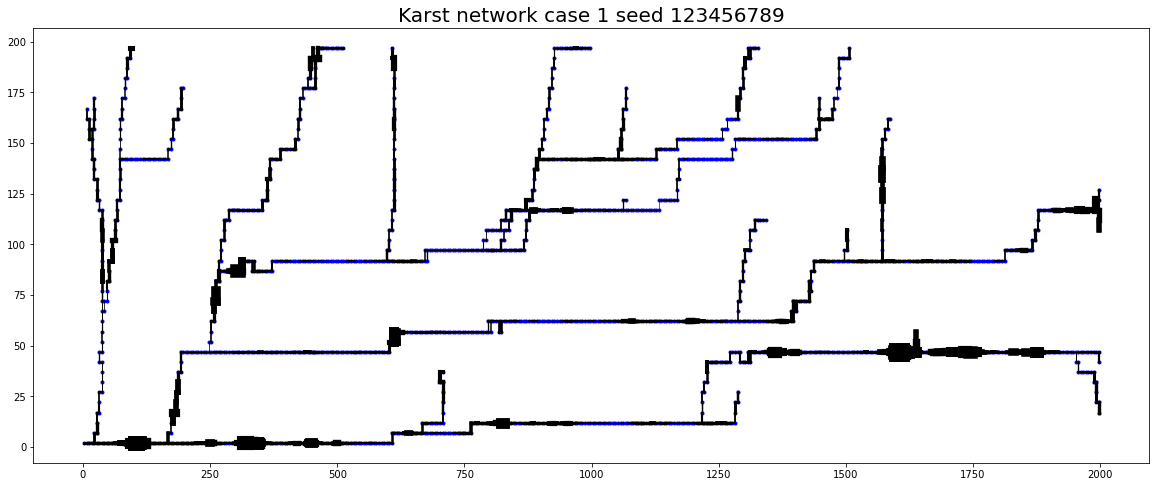

All the graph have been simplified!


In [7]:
#Simplify the graph and write the new files
nb_case = 1 # Defines the number of pykasso cases
dx, dy  = 5 , 5 # Defines the super grid for the simplification 
bbox    = [0, 2002, 0, 202] # The domain (only to control that points are inside)

#Coordinnate of the screen location where the conduit can be located
xmin, xmax = 0, 400
ymin, ymax = 0, 60

for i in range(nb_case):
    print('Start symplifying files for cas number {} :'.format(i+1))
    print("==============================")

    for nb in seed_nb:
        node_name = path_input_pykasso + 'nodes_cas{}_{}.txt'.format(i+1, nb)
        edge_name = path_input_pykasso + 'edges_cas{}_{}.txt'.format(i+1, nb)
        
        node_name_new = path_output_simplification + 'nodes_cas{}_{}_simply.txt'.format(i+1, nb)
        edge_name_new = path_output_simplification + 'edges_cas{}_{}_simply.txt'.format(i+1, nb)
        
        new_nodes, new_segs, pipe_diameter = simplify_graph(node_name, edge_name , bbox, dx, dx, verbose=False, seed=int(nb), test_rob=False)
        export_conduits(new_nodes, new_segs, node_name_new, edge_name_new)
        
        tunnel_locations = new_nodes[np.all([(new_nodes[:,0]>xmin), (new_nodes[:,0]<=xmax) ,(new_nodes[:,1]>ymin) , (new_nodes[:,1]<=ymax)],axis=0)]
        rd_choice   = np.random.choice(len(tunnel_locations))
        tunnel_rd   = tunnel_locations[rd_choice]
        node_tunnel = np.where((new_nodes[:,0] == tunnel_rd[0]) & (new_nodes[:,1] == tunnel_rd[1]))
        
        #info tunnel = cell x, cell y, node number (from 0 to nb_node-1)
        info_tunnel = np.array([int(new_nodes[node_tunnel,0][0][0]/dx), int(new_nodes[node_tunnel,1][0][0]/dy), node_tunnel[0][0]])
        np.savetxt(path_output_simplification+'tunnel_info_cas{}_{}.txt'.format(i+1,nb), info_tunnel,fmt='%2d')
        
    print('Finish to symplified files for cas number {}!'.format(i+1))
    print("==============================")

    plot_conduits(new_nodes, new_segs, node_name_new, edge_name_new, case=1, seed=nb)
    
print("==============================")
print('All the graph have been simplified!')
print("==============================")

In [25]:
pipe_diameter

array([[2.11835345, 2.2280024 , 2.21614888, ..., 3.5832707 , 2.78029624,
        2.1937413 ],
       [1.69543319, 1.78379233, 1.85782452, ..., 2.47844044, 2.29534552,
        2.04855113],
       [1.82633037, 1.84428255, 1.91568483, ..., 3.28695017, 2.5881194 ,
        2.42175079],
       ...,
       [1.33522548, 1.26730127, 1.2505501 , ..., 1.92200186, 1.91281012,
        1.80988409],
       [1.18249927, 1.22588141, 1.30238806, ..., 2.06083236, 1.90295877,
        2.0177474 ],
       [1.05029729, 1.28780001, 1.51014478, ..., 2.36716186, 2.63595203,
        2.71112549]])

In [26]:
np.savetxt('pykasso_networks_simply_mf6/pipe_diameter.txt',pipe_diameter)

## Export the output files for Modflow 5 cfp

Loop through the files present in pykasso_networks_simply

In [8]:
#Read the simplified grid and write the cfp input files
path_output_cfp = 'pykasso_networks_simply_cfp/'
nb_case = 1    # Defines the number of pykasso cases

for i in range(nb_case):
    print('Start writting input files for cas number {} :'.format(i+1))
    print("==============================")

    for nb in seed_nb:
        
        dir = path_output_cfp+'cas_{}_{}'.format(i+1, nb)
        if os.path.exists(dir):
            shutil.rmtree(dir)
        os.makedirs(dir)
        
        node_name = path_output_simplification+'nodes_cas{}_{}_simply.txt'.format(i+1, nb)
        edge_name = path_output_simplification+'edges_cas{}_{}_simply.txt'.format(i+1, nb)   
        
        nodes = np.loadtxt(node_name)[:,1:]
        segs  = np.loadtxt(edge_name)       
        
        #info tunnel = cell x, cell y, node number (from 0 to nb_node-1)
        info_tunnel = np.loadtxt(path_output_simplification+'tunnel_info_cas{}_{}.txt'.format(i+1,nb))
        np.savetxt(dir+'/tunnel_info.txt', info_tunnel,fmt='%2d')
        
        write_geoheight(nodes, dir)
        write_kexch(nodes, dir)
        write_node_heads(nodes, dir, node_out=node_tunnel[0][0]+1)
        write_pipe_info(segs, dir)
        write_network_info(nodes, segs, dir, dx, dy)
        
    print('Finish to writte input files for cas number{}!'.format(i+1))
    print("==============================")
    
print("==============================")
print('All the Modflow cfp input folder and files have been created!')
print("==============================")

Start writting input files for cas number 1 :
Finish to writte input files for cas number1!
All the Modflow cfp input folder and files have been created!


In [12]:
info_tunnel

array([ 26.,  34., 490.])

## Export the output files for MF6
Loop through the files present in pykasso_networks_simply


In [9]:
path_output_simplification = 'pykasso_networks_simply_mf6/'
path_input_simplification   = 'pykasso_networks_simply/'
node_name = path_input_simplification+'nodes_cas{}_{}_simply.txt'.format(i+1, nb)
nodes     = np.loadtxt(node_name)[:,1:]

In [12]:
sx, sy = 2000,200
t      = np.zeros((int(sy/dy),int(sx/dx)))

for n in nodes:
    t[int(n[1]/dx),int(n[0]/dx)] = 1

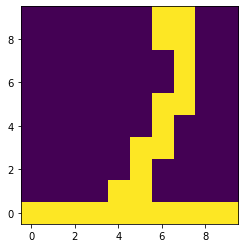

In [13]:
plt.imshow(t[0:10,0:10], origin='bot')
plt.show()

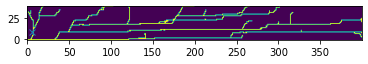

In [14]:
plt.imshow(t, origin='bot')
plt.plot(int(info_tunnel[0]), int(info_tunnel[1]),'x')
plt.show()

In [20]:
np.savetxt(path_output_simplification+'/cas_test_.txt', t)
np.savetxt(path_output_simplification+'/tunel.txt', info_tunnel)

In [21]:
info_tunnel

array([ 26.,  34., 490.])